<a href="https://colab.research.google.com/github/ZrowGz/trading-bot/blob/viny/Test3_52_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [ ]:
from google.colab import files

csv_file = files.upload()

Saving btc_metrics.csv to btc_metrics.csv


In [ ]:
# Read the bitcoin Glassnode indicator data into a Pandas DataFrame
btc_df = pd.read_csv("btc_metrics.csv")

# Review the DataFrame
btc_df.head()

,date,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,stablecoin_supply,rhodl,cvdd,rpv,balanced_price,investor_capitalization
0,2016-01-01,434.883982,1.017900,1.430684,3084.261365,0.149233,0.707518,6810666.0,0.829427,7.160297,0.310327,NaN,336.693607,169.528788,0.000537,232.840772,3.017275e+09
1,2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,NaN,322.022994,169.513770,0.000265,232.941445,3.017969e+09
2,2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,NaN,328.552037,169.551559,0.000715,233.108481,3.019992e+09
3,2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,NaN,313.990154,169.582557,0.000692,233.317436,3.022417e+09
4,2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,NaN,324.924804,169.652235,0.000679,233.463981,3.024257e+09


In [ ]:
#Create price perdent change column
btc_df["price_pct"] = btc_df["price"].pct_change()
#Drop unwanted indicator
btc_df = btc_df.drop(columns=["stablecoin_supply", "nonzero_balance_addresses", "investor_capitalization", "balanced_price", "%_utxo_in_profit", "nvt", "cvdd", "rpv"])
#Turn % change into 1/0 indicator
btc_df["BS"] =  np.where(btc_df['price_pct']<0, 0, 1)
btc_df = btc_df.dropna()
btc_df
#shift 1/0 indicator back 1 so indicators are leading
btc_df["BS"] = btc_df["BS"].shift(-1)
#drop unwanted data, but preserve for future use in new dataframe
btc_df = btc_df.dropna()
btc_price = pd.DataFrame(btc_df[["price", "date"]], columns=[['price', 'date']])
btc_price
btc_df = btc_df.drop(columns=["price", "date"])
btc_df

,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nupl,rhodl,price_pct,BS
1,1.006339,1.539487,-1595.518899,0.151165,0.707028,0.308427,322.022994,0.000088,0.0
2,1.015510,1.525893,12546.093856,0.153052,0.686532,0.302795,328.552037,-0.009019,1.0
3,1.016040,1.910143,2674.063117,0.154920,0.699454,0.305813,313.990154,0.006734,0.0
4,1.009311,1.654511,-17321.634925,0.156768,0.694940,0.303631,324.924804,-0.001695,0.0
5,1.009046,1.478699,2674.220665,0.158597,0.677147,0.300722,334.869010,-0.007483,1.0
...,...,...,...,...,...,...,...,...,...
2156,0.987623,1.129156,12973.500233,0.072150,2.420237,0.544700,10794.319015,-0.087670,1.0
2157,0.994843,1.204431,2354.575838,0.071869,2.481278,0.551288,10562.501897,0.014515,1.0
2158,1.007457,1.165534,4600.730240,0.070742,2.691848,0.571931,10635.142280,0.048763,1.0
2159,1.023722,1.263554,6915.509012,0.069836,2.751011,0.575634,10245.307366,0.010740,0.0


In [ ]:
# Define features set X by selecting all columns but DEFAULT
X = btc_df.drop(columns=["BS"]).copy()

# Display the features DataFrame
X.head()

,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nupl,rhodl,price_pct
1,1.006339,1.539487,-1595.518899,0.151165,0.707028,0.308427,322.022994,0.000088
2,1.015510,1.525893,12546.093856,0.153052,0.686532,0.302795,328.552037,-0.009019
3,1.016040,1.910143,2674.063117,0.154920,0.699454,0.305813,313.990154,0.006734
4,1.009311,1.654511,-17321.634925,0.156768,0.694940,0.303631,324.924804,-0.001695
5,1.009046,1.478699,2674.220665,0.158597,0.677147,0.300722,334.869010,-0.007483


In [ ]:
# Define target set by selecting the DEFAULT column
y = btc_df["BS"]

# Display a sample y
y[:5]

1    0.0
2    1.0
3    0.0
4    0.0
5    1.0
Name: BS, dtype: float64

In [ ]:
# Create training and testing datasets using train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Create the StandardScaler instance
X_scaler = StandardScaler()

In [ ]:
# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

StandardScaler()

In [ ]:
# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
# Define the the number of inputs to the model
number_inputs = 8

# Define the number of hidden nodes for the model
number_hidden_nodes = 4

# Create the Sequential model instance
neuron = Sequential()

# Add a Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
neuron.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
neuron.add(Dense(1, activation="sigmoid"))

In [ ]:
neuron.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
# Compile the Sequential model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model using 100 epochs and the training data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
51/51 [==============================] - 0s 2ms/step - loss: 0.7813 - accuracy: 0.5167
Epoch 2/100
51/51 [==============================] - 0s 1ms/step - loss: 0.7520 - accuracy: 0.5210
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 0.7339 - accuracy: 0.5235
Epoch 4/100
51/51 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.5302
Epoch 5/100
51/51 [==============================] - 0s 1ms/step - loss: 0.7159 - accuracy: 0.5290
Epoch 6/100
51/51 [==============================] - 0s 1ms/step - loss: 0.7105 - accuracy: 0.5290
Epoch 7/100
51/51 [==============================] - 0s 1ms/step - loss: 0.7062 - accuracy: 0.5309
Epoch 8/100
51/51 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.5321
Epoch 9/100
51/51 [==============================] - 0s 1ms/step - loss: 0.7007 - accuracy: 0.5358
Epoch 10/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.5309
Epoch 11/

In [ ]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

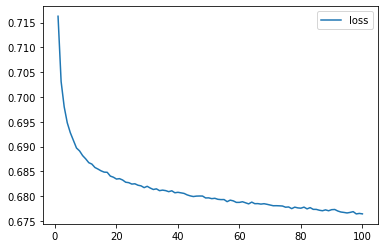

In [ ]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

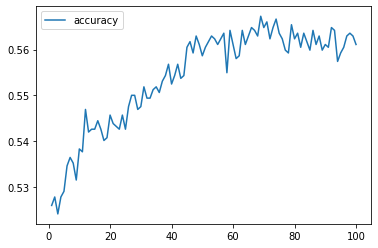

In [ ]:
# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")

In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

17/17 - 0s - loss: 0.6905 - accuracy: 0.5222 - 144ms/epoch - 8ms/step
Loss: 0.6905351877212524, Accuracy: 0.5222222208976746
